<h1><center>EXPERIMENT 5</center></h1>
<h3>AIM :</h3> To implement image classification using transfer learning for dogs vs cats dataset
<br>
<h3>Thoery:</h3>
Image classification using transfer learning for dogs vs cats dataset is a popular application of deep learning in computer vision. In this task, we use a pre-trained neural network to classify images of dogs and cats. Transfer learning refers to the use of a pre-trained model as a starting point for a new model, and fine-tuning it to fit a new task.

The VGG16 model, pre-trained on the ImageNet dataset, is commonly used as a base model for this task. The VGG16 model consists of 13 convolutional layers and 3 fully connected layers, and has been shown to achieve high accuracy on image classification tasks.

To use transfer learning with the VGG16 model, we can load the pre-trained model, freeze the layers, and add some fully connected layers on top of it. We can then train the added layers on our own dataset of dogs and cats. By doing this, we can leverage the knowledge learned by the VGG16 model on the ImageNet dataset, and use it to improve the accuracy of our own model.

In the training process, we typically use data augmentation techniques to increase the number of training images and prevent overfitting. We can also use techniques such as early stopping to prevent the model from overfitting the training data.

Once the model is trained, we can evaluate its performance on a separate test dataset, and use techniques such as confusion matrices to analyze its performance. We can also create visualizations of the model's performance, such as plots of the training and validation accuracy and loss over the epochs.

In [ ]:
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout


In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68606236/68606236 [==============================] - 3s 0us/step


In [ ]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
# Set parameters
batch_size = 32
epochs = 10
img_height = 150
img_width = 150

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


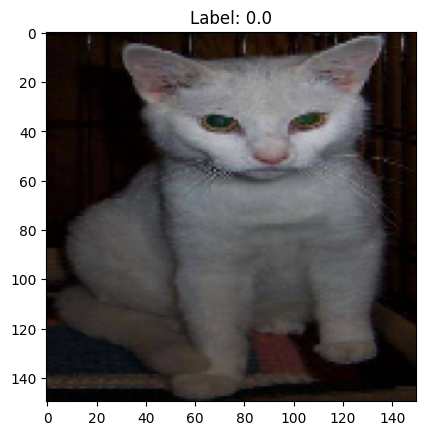

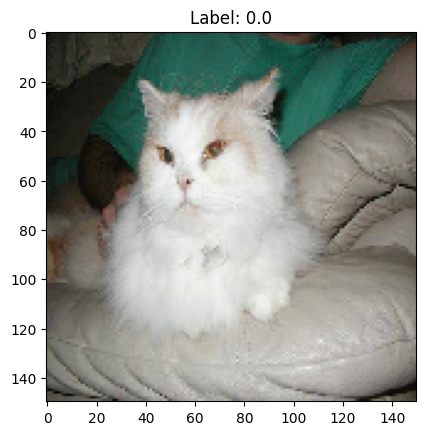

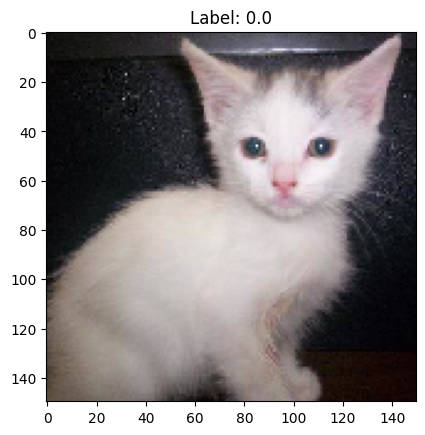

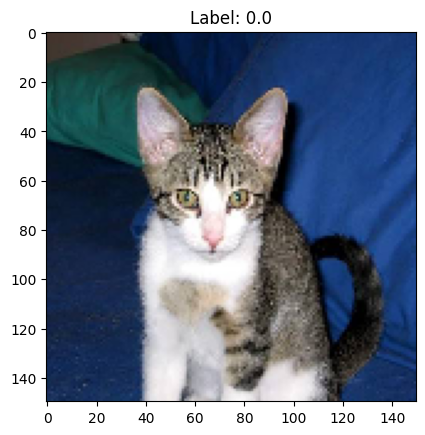

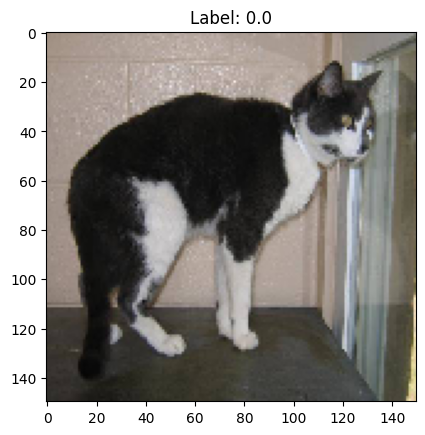

In [ ]:

# Get a batch of images from the validation generator
x_batch, y_batch = val_generator.next()

# Display the first few images
num_images = 5
for i in range(num_images):
    plt.imshow(x_batch[i])
    plt.title('Label: {}'.format(y_batch[i]))
    plt.show()


## VGG16
 A deep convolutional neural network architecture that was developed by researchers at the University of Oxford for the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2014. The architecture was named after the Visual Geometry Group at Oxford.

The VGG16 network consists of 16 layers, including 13 convolutional layers and 3 fully connected layers. The convolutional layers are arranged in a series of blocks, each consisting of two or more convolutional layers followed by a max pooling layer. The final fully connected layers are followed by a softmax activation function, which produces a probability distribution over the classes in the dataset.

One notable aspect of the VGG16 architecture is that all the convolutional layers have a small filter size of 3x3 and a stride of 1, which helps to preserve spatial information and avoid overfitting. The number of filters in each convolutional layer increases as we move deeper into the network, allowing the network to learn increasingly complex features at higher levels of abstraction.

VGG16 was trained on the ImageNet dataset, which contains over 1 million images with 1000 classes. The network achieved a top-5 error rate of 7.32% on the ILSVRC challenge, which was a significant improvement over previous state-of-the-art models.

In [ ]:
# Load the pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
# Freeze the base model
base_model.trainable = False

In [ ]:
# Build the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
epochs=2
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size)


Epoch 1/2
62/62 [==============================] - 801s 13s/step - loss: 0.3558 - accuracy: 0.8379 - val_loss: 0.2890 - val_accuracy: 0.8669
Epoch 2/2
62/62 [==============================] - 791s 13s/step - loss: 0.3091 - accuracy: 0.8694 - val_loss: 0.2634 - val_accuracy: 0.8821


In [ ]:
# Save the model
model.save('dogs_vs_cats.h5')

In [ ]:
# Evaluate the model
test_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)


Found 1000 images belonging to 2 classes.
31/31 [==============================] - 257s 8s/step - loss: 0.2654 - accuracy: 0.8810


In [ ]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8810483813285828


Text(0.5, 1.0, 'Training and Validation Accuracy')

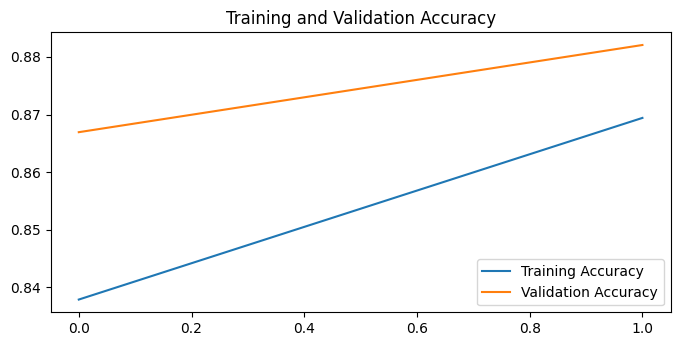

In [ ]:
# Plot the accuracy and loss

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

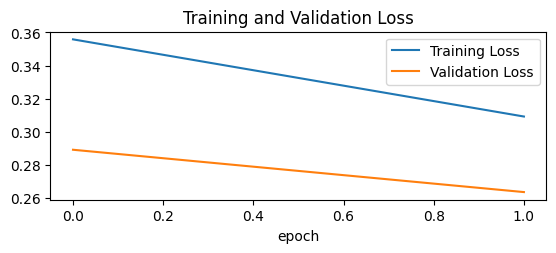

In [ ]:
plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

<h3>Conclusion </h3>
Image classification using transfer learning for dogs vs cats dataset is successfully implemented